# CNN containing some examples from test users (hybrid). 

In [1]:
from numpy.random import seed
seed(1)
import numpy as np
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from src.utils import utils
from src.reporting import plot_confusion_matrix
%matplotlib inline

Using TensorFlow backend.


### Load dataset

In [2]:
print('Loading data...')
df = pd.read_csv('data/cleaned_WISDM_v1')
print('Data loaded!')

Loading data...
Data loaded!


### Encode labels

In [3]:
# Transform classes into numeric values and add one-hot-encoding and add concatenate to dataframe.
label_names= np.unique(df['activity'])
df = utils.encode_labels(df, 'activity')
df = df.drop(['user', 'activity', 'timeastamp'], axis=1)
labels = np.array(df[label_names])

### Format data with sliding window, shuffle and split (hybrid model). 

In [4]:
#Format data and window data.
window = 128
stride = 64

windowed_df = utils.sliding_window(df[['x','y','z']], (window, df[['x','y','z']].shape[1]), stride)
windowed_labels = utils.sliding_window(labels, (window, labels.shape[1]), stride)
extracted_labels = utils.extract_labels(windowed_labels)
assert (windowed_df.shape[0] == extracted_labels.shape[0])
shuffled_data, shuffled_target = shuffle(windowed_df,extracted_labels, random_state=1)

print('Data shape: {}'.format(shuffled_data.shape))
print('Data shape: {}'.format(shuffled_target.shape))

def format_channels(windowed_data, num_channels):
    data_separated = utils.separate_windowed_channels(windowed_data, num_channels)
    data_reshaped = np.reshape(data_separated, data_separated.shape+(1,))
    return data_reshaped


Data shape: (17158, 128, 3)
Data shape: (17158, 6)


### Load model

In [5]:
print('Loading model...')
model_path = 'models/5_fold_cross_validations_models/'
models = [
    'multi_cnn3_all_conv_hybrid_model_09_Jan_2018_16:37:41_fold_0',
    'multi_cnn3_all_conv_hybrid_model_09_Jan_2018_16:37:41_fold_1',
    'multi_cnn3_all_conv_hybrid_model_09_Jan_2018_16:37:41_fold_2',
    'multi_cnn3_all_conv_hybrid_model_09_Jan_2018_16:37:41_fold_3',
    'multi_cnn3_all_conv_hybrid_model_09_Jan_2018_16:37:41_fold_4'
        ]
print('Model loaded!')

Loading model...
Model loaded!


test shape: (3432, 128, 3) (3432, 6)
Loading model for fold 0 ...
Model for fold 0 loaded!
F-measure score on test set on fold: 
0
             precision    recall  f1-score   support

          0       0.81      0.89      0.85       300
          1       1.00      0.99      0.99      1095
          2       0.98      0.96      0.97       183
          3       0.96      0.99      0.97       148
          4       0.90      0.88      0.89       417
          5       0.99      0.99      0.99      1289

avg / total       0.97      0.96      0.96      3432

Macro f-score (sci-kit learn implementation): 0.9444783914610277
Confusion matrix, without normalization


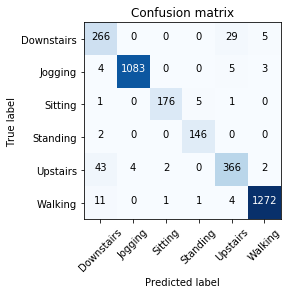

test shape: (3432, 128, 3) (3432, 6)
Loading model for fold 1 ...
Model for fold 1 loaded!
F-measure score on test set on fold: 
1
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       300
          1       0.98      0.99      0.99      1078
          2       0.96      0.96      0.96       170
          3       0.92      0.96      0.94       175
          4       0.84      0.89      0.87       378
          5       0.99      0.98      0.98      1331

avg / total       0.96      0.96      0.96      3432

Macro f-score (sci-kit learn implementation): 0.9294857558007142
Confusion matrix, without normalization


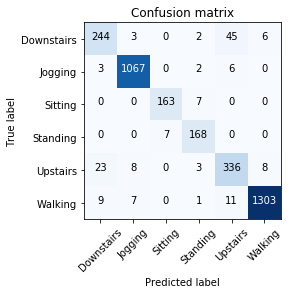

test shape: (3432, 128, 3) (3432, 6)
Loading model for fold 2 ...
Model for fold 2 loaded!
F-measure score on test set on fold: 
2
             precision    recall  f1-score   support

          0       0.85      0.79      0.82       312
          1       0.98      0.99      0.98      1058
          2       0.95      0.97      0.96       197
          3       0.96      0.92      0.94       142
          4       0.85      0.81      0.83       404
          5       0.96      0.99      0.97      1319

avg / total       0.94      0.94      0.94      3432

Macro f-score (sci-kit learn implementation): 0.9178341440060339
Confusion matrix, without normalization


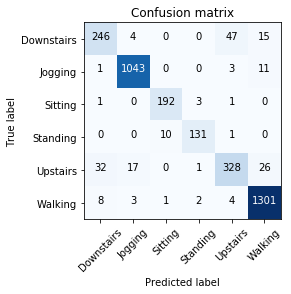

test shape: (3431, 128, 3) (3431, 6)
Loading model for fold 3 ...
Model for fold 3 loaded!
F-measure score on test set on fold: 
3
             precision    recall  f1-score   support

          0       0.84      0.87      0.86       334
          1       0.97      0.99      0.98      1042
          2       1.00      0.93      0.96       219
          3       0.93      0.96      0.94       145
          4       0.87      0.77      0.82       347
          5       0.97      0.98      0.98      1344

avg / total       0.95      0.95      0.95      3431

Macro f-score (sci-kit learn implementation): 0.9217693421537335
Confusion matrix, without normalization


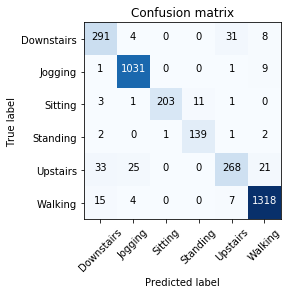

test shape: (3431, 128, 3) (3431, 6)
Loading model for fold 4 ...
Model for fold 4 loaded!
F-measure score on test set on fold: 
4
             precision    recall  f1-score   support

          0       0.80      0.85      0.82       320
          1       0.99      0.99      0.99      1072
          2       0.97      0.93      0.95       166
          3       0.91      0.95      0.93       146
          4       0.86      0.81      0.84       382
          5       0.99      0.99      0.99      1345

avg / total       0.95      0.95      0.95      3431

Macro f-score (sci-kit learn implementation): 0.9185329004418955
Confusion matrix, without normalization


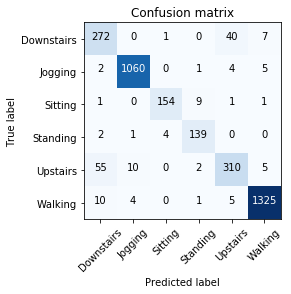

In [6]:
ksplit = KFold(n_splits=5, random_state=1)
fold = 0
conf_matrices = []
macro_avg_accum = 0

for train_split, test_split in ksplit.split(shuffled_data):
    
    test, target_test = shuffled_data[test_split], shuffled_target[test_split]

    print('test shape: {} {}'.format(test.shape, target_test.shape))

    test_x, test_y, test_z = format_channels(test, 3)

    print('Loading model for fold {} ...'.format(fold)) 
    model = load_model(model_path+models[fold])
    print('Model for fold {} loaded!'.format(fold))

    # Predict based on test set.
    probs = model.predict([test_x, test_y, test_z])
    # Class is the index with the largest probability
    y_pred= probs.argmax(-1)
    # target_test is the index with 1 (largest value)
    y_true = target_test.argmax(-1)
    
    # Reporting
    report = classification_report(y_true,y_pred)
    print('F-measure score on test set on fold: \n{}\n{}'.format(fold, report))

    metric_macro = precision_recall_fscore_support(y_true, y_pred, average='macro', beta=1)
    # Index 2 contains macro f scores.
    print('Macro f-score (sci-kit learn implementation): {}'.format(metric_macro[2]))

    # Confusion matrix
    conf_mat = confusion_matrix(y_true,y_pred)
    plot_confusion_matrix(conf_mat, label_names)
    conf_matrices.append(conf_mat)
    macro_avg_accum+=metric_macro[2]
    fold+=1

In [7]:
agreg_conf_mat = np.sum(conf_matrices, axis=0)
agreg_conf_mat 

array([[1319,   11,    1,    2,  192,   41],
       [  11, 5284,    0,    3,   19,   28],
       [   6,    1,  888,   35,    4,    1],
       [   6,    1,   22,  723,    2,    2],
       [ 186,   64,    2,    6, 1608,   62],
       [  53,   18,    2,    5,   31, 6519]])

Confusion matrix, without normalization


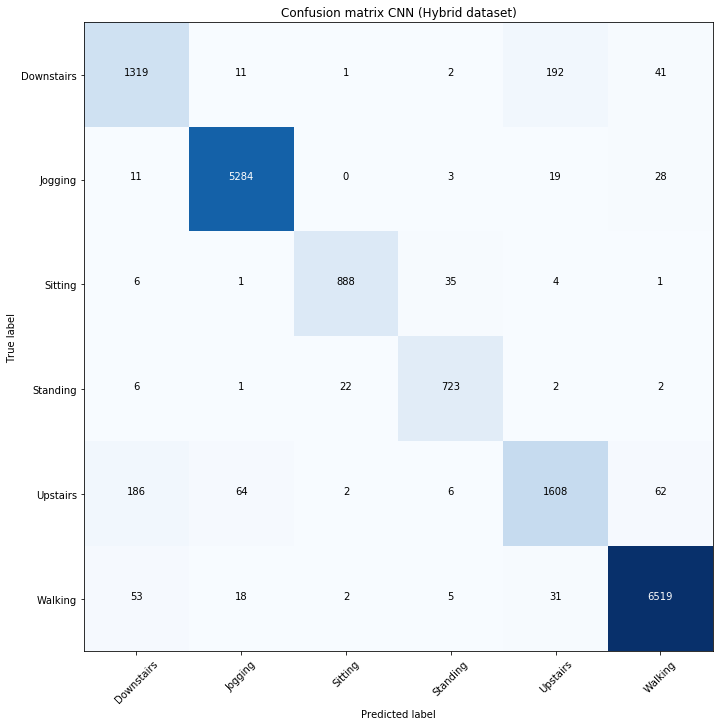

Average Macro F-score:  0.926420106773


In [8]:
plt.figure(figsize=(20,10))
plot_confusion_matrix(agreg_conf_mat, label_names, title='Confusion matrix CNN (Hybrid dataset)')
print('Average Macro F-score: ', macro_avg_accum/5)